In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from fancyimpute import KNN
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
os.chdir("D:\\ANN\\ANN\\")

In [3]:
data = pd.read_csv("1.csv",thousands = ',')

In [4]:
data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0


In [5]:
data.dtypes

ID                                 int64
Reason for absence                 int64
Month of absence                   int64
Day of the week                    int64
Seasons                            int64
Transportation expense             int64
Distance from Residence to Work    int64
Service time                       int64
Age                                int64
Work load Average per day          int64
Hit target                         int64
Disciplinary failure               int64
Education                          int64
Son                                int64
Social drinker                     int64
Social smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body mass index                    int64
Absenteeism time in hours          int64
dtype: object

In [6]:
data.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average per day          38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

# 缺失值分析

In [7]:
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


### 每一个变量都是740个，没有缺失值

# 将变量分为分类变量和连续变量

In [8]:
category_column_names = ['ID','Reason for absence','Month of absence','Day of the week','Seasons','Disciplinary failure', 'Education', 
                         'Son', 'Social drinker','Social smoker', 'Pet']

In [9]:
for i in category_column_names :
    data[i] = data[i].astype('category')
    
continous_column_names = []

for i in data.columns:
    if i not in category_column_names:
        data[i] = data[i].astype('float')
        continous_column_names.append(i)

In [10]:
category_column_names

['ID',
 'Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet']

In [11]:
continous_column_names

['Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average per day ',
 'Hit target',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [12]:
data.dtypes

ID                                 category
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense              float64
Distance from Residence to Work     float64
Service time                        float64
Age                                 float64
Work load Average per day           float64
Hit target                          float64
Disciplinary failure               category
Education                          category
Son                                category
Social drinker                     category
Social smoker                      category
Pet                                category
Weight                              float64
Height                              float64
Body mass index                     float64
Absenteeism time in hours           float64
dtype: object

# 连续变量分析

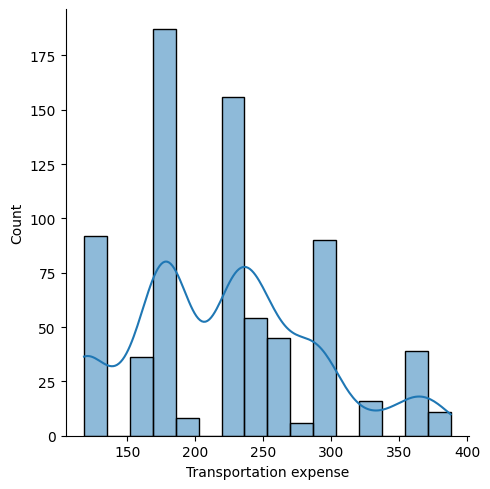

In [13]:
sns.displot(data['Transportation expense'],kde = True)

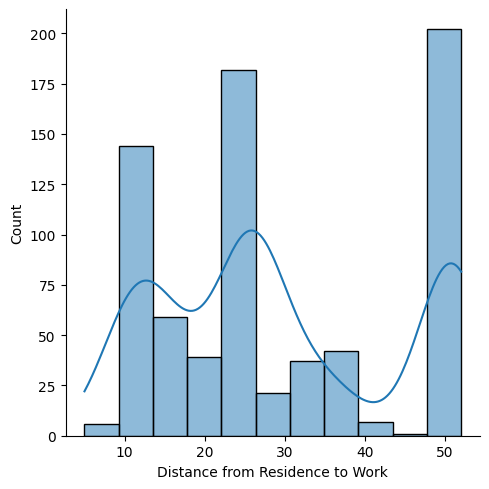

In [14]:
sns.displot(data['Distance from Residence to Work'],kde = True)

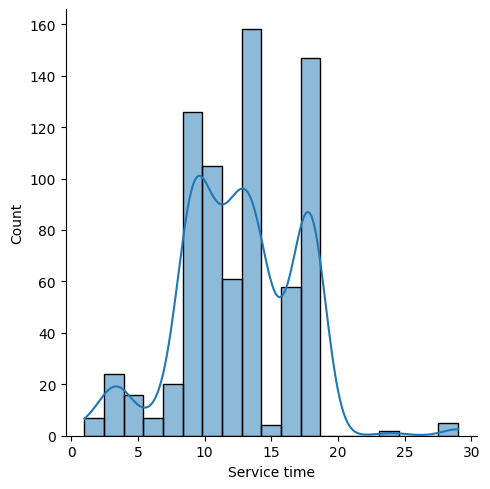

In [15]:
sns.displot(data['Service time'],kde = True)

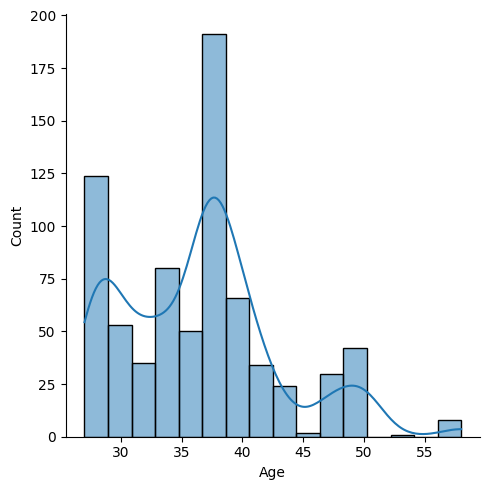

In [16]:
sns.displot(data['Age'],kde = True)

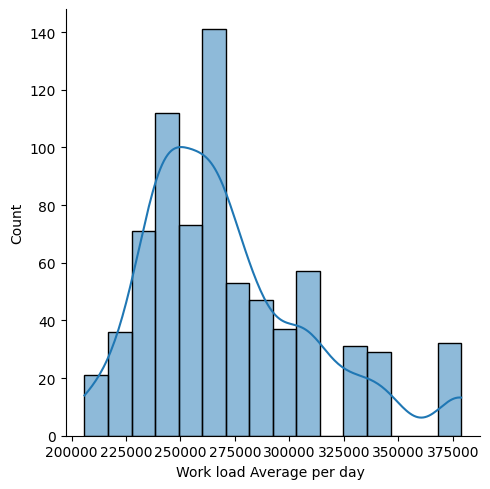

In [17]:
sns.displot(data['Work load Average per day '],kde = True)

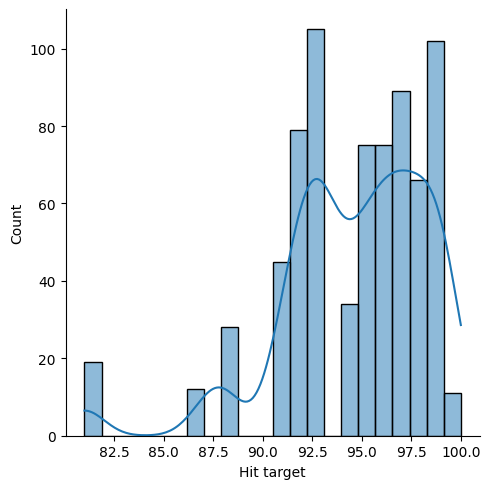

In [18]:
sns.displot(data[ 'Hit target'],kde = True)

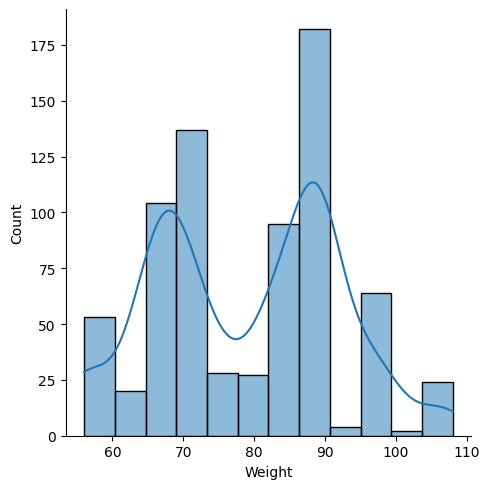

In [19]:
sns.displot(data['Weight'],kde = True)

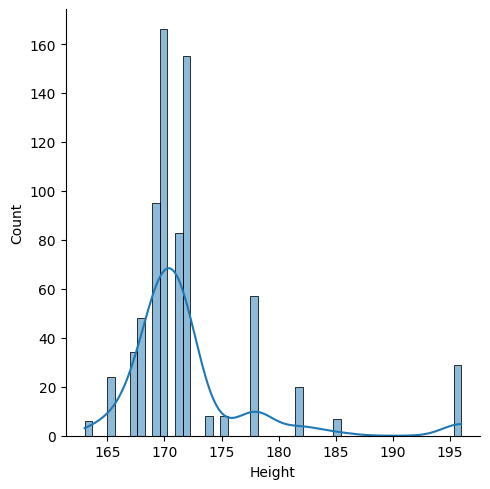

In [20]:
sns.displot(data['Height'],kde = True)

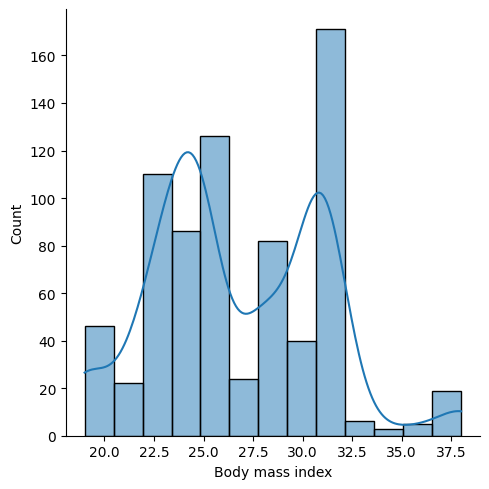

In [21]:
sns.displot(data['Body mass index'],kde = True)

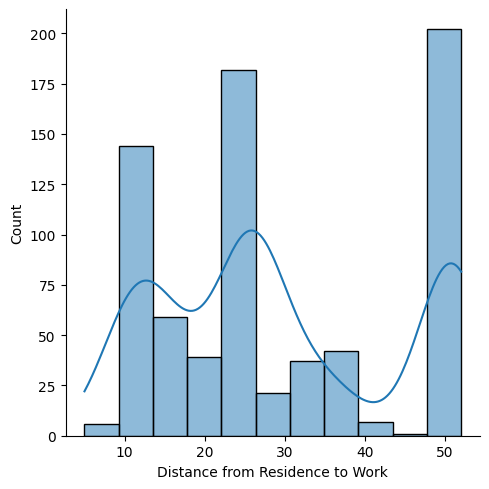

In [22]:
sns.displot(data['Distance from Residence to Work'],kde = True)

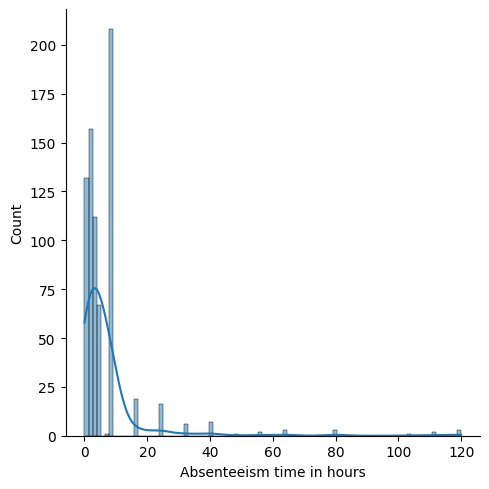

In [23]:
sns.displot(data['Absenteeism time in hours'],kde = True)

# 离群点分析

### 画箱线图

In [24]:
continous_column_names

['Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average per day ',
 'Hit target',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

<Axes: >

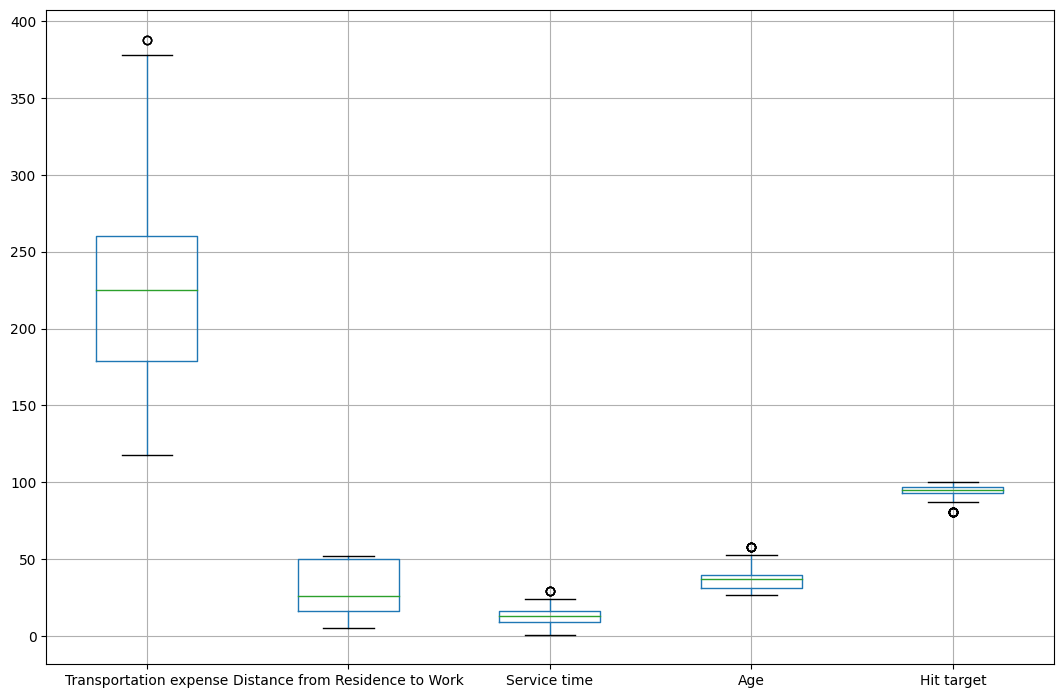

In [25]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 8.5
plt.rcParams["figure.figsize"] = fig_size
data.boxplot(column=['Transportation expense','Distance from Residence to Work', 'Service time', 'Age','Hit target'])

<Axes: >

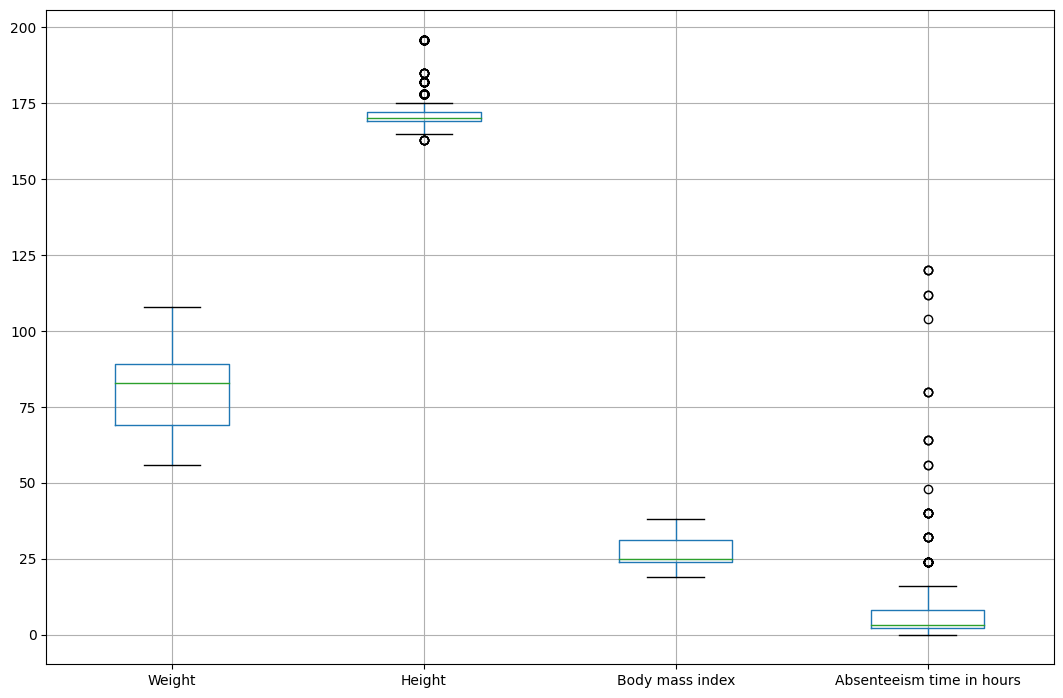

In [26]:
data.boxplot(column = ['Weight', 'Height', 'Body mass index','Absenteeism time in hours'])

<Axes: >

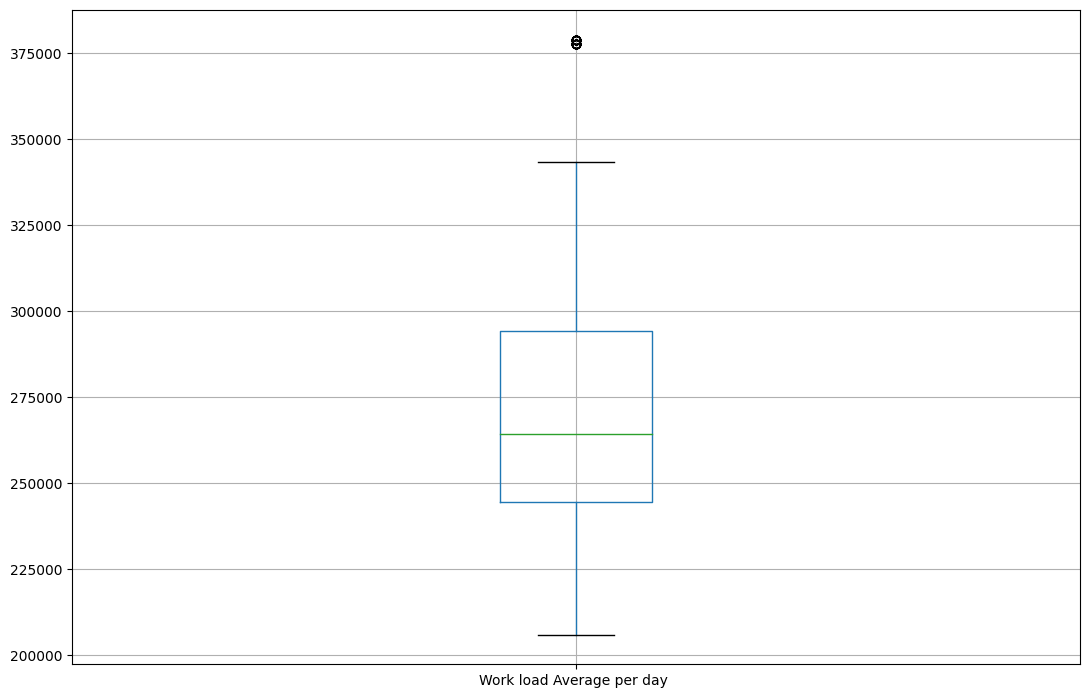

In [27]:
data.boxplot(column = ["Work load Average per day "])

##### 上面画了连续变量的箱线图，发现有几个有·离群点，也就是下面这几个，可以自己对一下，然后划一个范围，比这个范围小的替成范围的左区间，大的右区间，再画图就没有离群点了

In [28]:
for i in ['Transportation expense','Service time','Age','Hit target','Height',\
'Absenteeism time in hours',"Work load Average per day "]:
    q75,q25 = np.percentile(data.loc[:,i],[75,25])
    iqr = q75-q25
    min = q25-1.5*iqr
    max = q75+1.5*iqr
    data.loc[data[i] < min,i] = min
    data.loc[data[i] > max,i] = max

<Axes: >

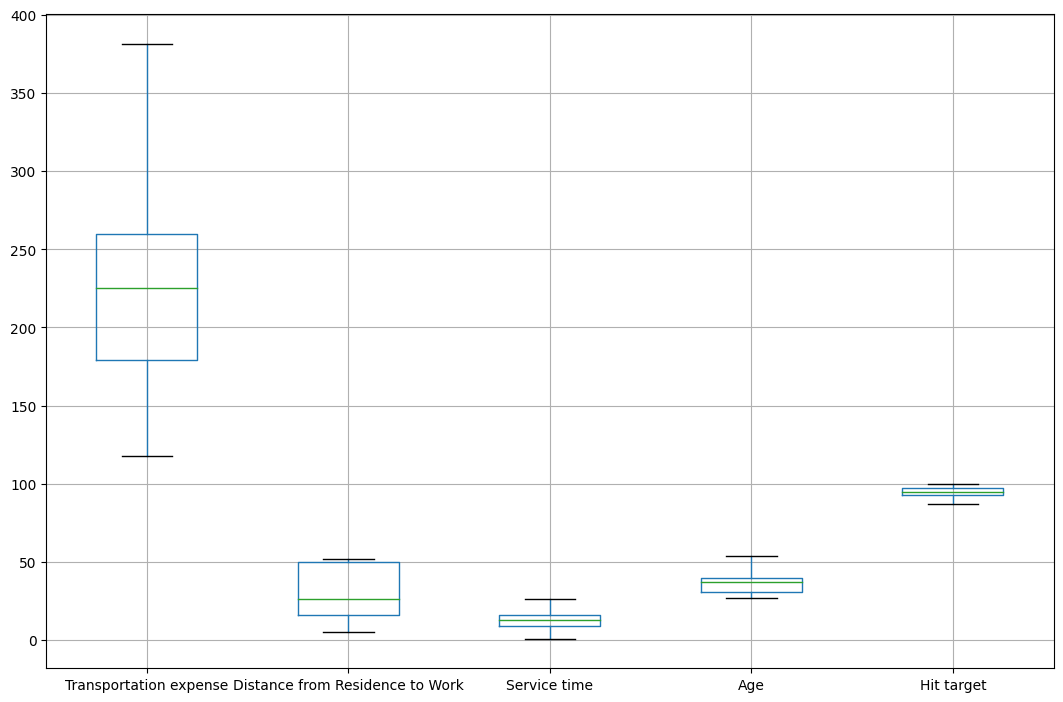

In [29]:
data.boxplot(column=['Transportation expense','Distance from Residence to Work', 'Service time', 'Age','Hit target'])

<Axes: >

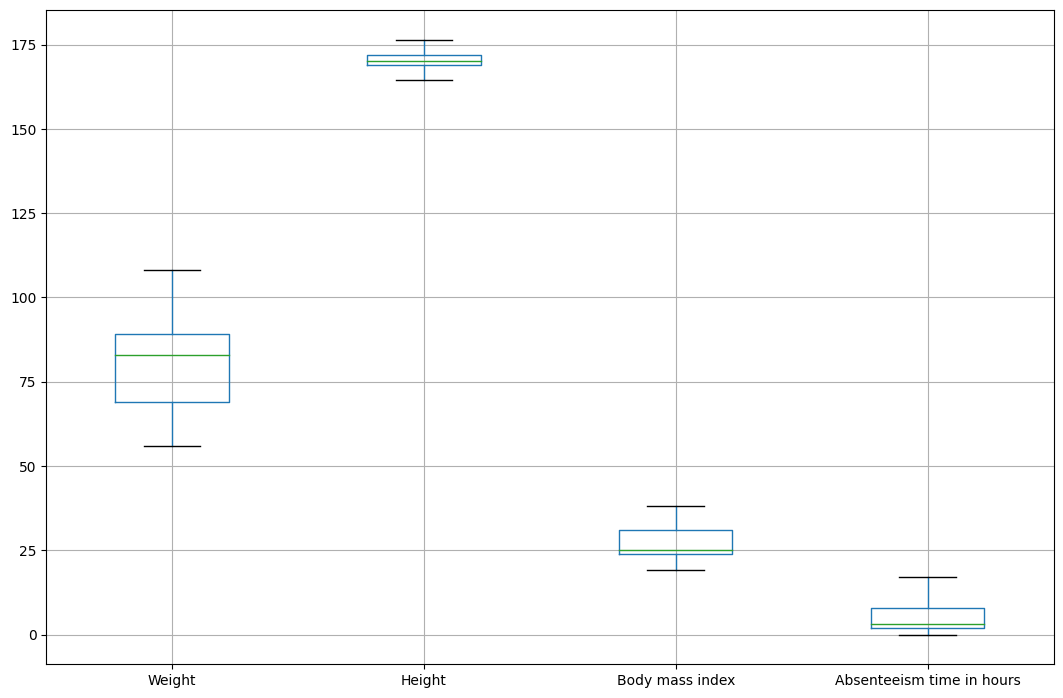

In [30]:
data.boxplot(column = ['Weight', 'Height', 'Body mass index','Absenteeism time in hours'])

<Axes: >

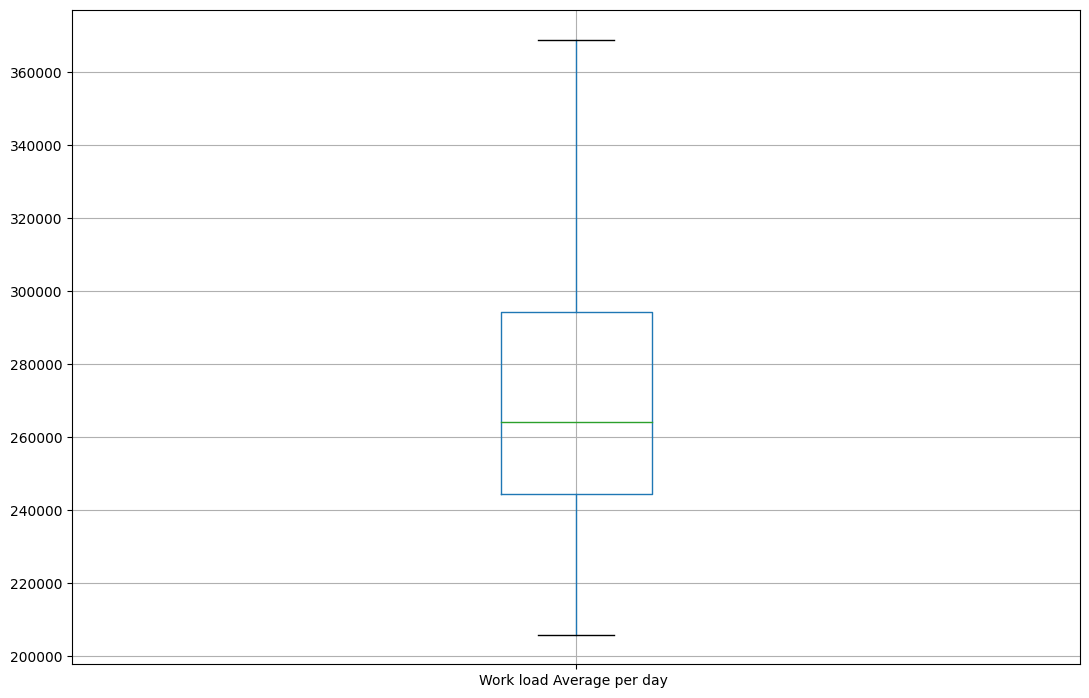

In [31]:
data.boxplot(column=["Work load Average per day "])

# 相关性分析

分类变量

In [32]:
data.dtypes

ID                                 category
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense              float64
Distance from Residence to Work     float64
Service time                        float64
Age                                 float64
Work load Average per day           float64
Hit target                          float64
Disciplinary failure               category
Education                          category
Son                                category
Social drinker                     category
Social smoker                      category
Pet                                category
Weight                              float64
Height                              float64
Body mass index                     float64
Absenteeism time in hours           float64
dtype: object

In [33]:
from scipy.stats import chi2_contingency

In [34]:
factors_paired = [(i,j) for i in category_column_names for j in category_column_names] 
chi2, p_values =[], []
for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(data[f[0]], data[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)

p1 = np.array(p_values).reshape((11,11))
p1 = pd.DataFrame(p1, index=category_column_names, columns=category_column_names)
p1

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet
ID,0.000000e+00,1.810839e-62,9.163415e-71,3.906508e-05,2.315948e-07,1.385552e-09,0.000000e+00,0.000000e+00,2.816608e-132,5.935732e-133,0.000000e+00
Reason for absence,1.810839e-62,0.000000e+00,1.064104e-18,5.806314e-02,7.712855e-22,4.286205e-127,1.237082e-10,5.969720e-20,1.757329e-08,2.766251e-09,4.820554e-17
Month of absence,9.163415e-71,1.064104e-18,0.000000e+00,5.622241e-01,0.000000e+00,5.973680e-05,1.313254e-02,6.056045e-05,9.584162e-03,2.314444e-02,3.417033e-07
Day of the week,3.906508e-05,5.806314e-02,5.622241e-01,0.000000e+00,1.953925e-01,4.096890e-01,5.484674e-01,5.728523e-08,6.138362e-01,8.076879e-01,4.233323e-01
Seasons,2.315948e-07,7.712855e-22,0.000000e+00,1.953925e-01,0.000000e+00,4.072567e-05,8.040298e-02,4.691163e-06,1.311925e-01,8.000933e-02,3.491039e-04
Disciplinary failure,1.385552e-09,4.286205e-127,5.973680e-05,4.096890e-01,4.072567e-05,0.000000e+00,3.516782e-01,5.756214e-02,2.127375e-01,4.191596e-03,3.577835e-02
Education,0.000000e+00,1.237082e-10,1.313254e-02,5.484674e-01,8.040298e-02,3.516782e-01,0.000000e+00,5.804434e-12,1.615193e-35,3.677654e-21,9.298662e-27
Son,0.000000e+00,5.969720e-20,6.056045e-05,5.728523e-08,4.691163e-06,5.756214e-02,5.804434e-12,0.000000e+00,8.880712e-10,5.737418e-22,1.613099e-89
Social drinker,2.816608e-132,1.757329e-08,9.584162e-03,6.138362e-01,1.311925e-01,2.127375e-01,1.615193e-35,8.880712e-10,0.000000e+00,3.787669e-03,9.392481e-27
Social smoker,5.935732e-133,2.766251e-09,2.314444e-02,8.076879e-01,8.000933e-02,4.191596e-03,3.677654e-21,5.737418e-22,3.787669e-03,0.000000e+00,1.951041e-20


卡方检验 去掉小于0.05的

In [35]:
data = data.drop(['Seasons','ID'],axis=1)

连续变量

In [36]:
data

,Reason for absence,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,289.0,36.0,13.0,33.0,239554.0,97.0,0,1,2,1,0,1,90.0,172.0,30.0,4.0
1,0,7,3,118.0,13.0,18.0,50.0,239554.0,97.0,1,1,1,1,0,0,98.0,176.5,31.0,0.0
2,23,7,4,179.0,51.0,18.0,38.0,239554.0,97.0,0,1,0,1,0,0,89.0,170.0,31.0,2.0
3,7,7,5,279.0,5.0,14.0,39.0,239554.0,97.0,0,1,2,1,1,0,68.0,168.0,24.0,4.0
4,23,7,5,289.0,36.0,13.0,33.0,239554.0,97.0,0,1,2,1,0,1,90.0,172.0,30.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,289.0,36.0,13.0,33.0,264604.0,93.0,0,1,2,1,0,1,90.0,172.0,30.0,8.0
736,11,7,3,235.0,11.0,14.0,37.0,264604.0,93.0,0,3,1,0,0,1,88.0,172.0,29.0,4.0
737,0,0,3,118.0,14.0,13.0,40.0,271219.0,95.0,0,1,1,1,0,8,98.0,170.0,34.0,0.0
738,0,0,4,231.0,35.0,14.0,39.0,271219.0,95.0,0,1,2,1,0,2,100.0,170.0,35.0,0.0


In [37]:
data.loc[:,continous_column_names].corr()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Weight,Height,Body mass index,Absenteeism time in hours
Transportation expense,1.000000,0.262825,-0.358638,-0.234663,0.003039,-0.082951,-0.207542,-0.153731,-0.136402,0.141225
Distance from Residence to Work,0.262825,1.000000,0.128687,-0.141167,-0.070633,0.002353,-0.047859,-0.333210,0.113772,-0.037847
Service time,-0.358638,0.128687,1.000000,0.682016,-0.007310,0.015246,0.453408,-0.088857,0.498033,-0.029698
Age,-0.234663,-0.141167,0.682016,1.000000,-0.038998,-0.025773,0.436831,0.007841,0.490010,-0.034673
Work load Average per day,0.003039,-0.070633,-0.007310,-0.038998,1.000000,-0.071211,-0.042664,0.037166,-0.093611,0.098170
Hit target,-0.082951,0.002353,0.015246,-0.025773,-0.071211,1.000000,-0.031213,0.085830,-0.072731,0.022902
Weight,-0.207542,-0.047859,0.453408,0.436831,-0.042664,-0.031213,1.000000,0.263057,0.904117,0.007797
Height,-0.153731,-0.333210,-0.088857,0.007841,0.037166,0.085830,0.263057,1.000000,-0.110156,0.092961
Body mass index,-0.136402,0.113772,0.498033,0.490010,-0.093611,-0.072731,0.904117,-0.110156,1.000000,-0.052910
Absenteeism time in hours,0.141225,-0.037847,-0.029698,-0.034673,0.098170,0.022902,0.007797,0.092961,-0.052910,1.000000


In [38]:
data = data.drop(['Weight'],axis = 1)

In [39]:
continous_column_names = ['Transportation expense',
                          'Distance from Residence to Work','Service time',
                          'Age','Work load Average per day ','Hit target', 'Height','Body mass index','Absenteeism time in hours']

In [40]:
category_column_names = ['Reason for absence', 'Month of absence', 'Day of the week','Disciplinary failure',
                         'Education', 'Son', 'Social drinker', 'Social smoker','Pet']

In [41]:
data_encoded = pd.get_dummies(data=data, columns=category_column_names)

In [42]:
data_encoded

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Height,Body mass index,Absenteeism time in hours,Reason for absence_0,...,Social drinker_0,Social drinker_1,Social smoker_0,Social smoker_1,Pet_0,Pet_1,Pet_2,Pet_4,Pet_5,Pet_8
0,289.0,36.0,13.0,33.0,239554.0,97.0,172.0,30.0,4.0,False,...,False,True,True,False,False,True,False,False,False,False
1,118.0,13.0,18.0,50.0,239554.0,97.0,176.5,31.0,0.0,True,...,False,True,True,False,True,False,False,False,False,False
2,179.0,51.0,18.0,38.0,239554.0,97.0,170.0,31.0,2.0,False,...,False,True,True,False,True,False,False,False,False,False
3,279.0,5.0,14.0,39.0,239554.0,97.0,168.0,24.0,4.0,False,...,False,True,False,True,True,False,False,False,False,False
4,289.0,36.0,13.0,33.0,239554.0,97.0,172.0,30.0,2.0,False,...,False,True,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,289.0,36.0,13.0,33.0,264604.0,93.0,172.0,30.0,8.0,False,...,False,True,True,False,False,True,False,False,False,False
736,235.0,11.0,14.0,37.0,264604.0,93.0,172.0,29.0,4.0,False,...,True,False,True,False,False,True,False,False,False,False
737,118.0,14.0,13.0,40.0,271219.0,95.0,170.0,34.0,0.0,True,...,False,True,True,False,False,False,False,False,False,True
738,231.0,35.0,14.0,39.0,271219.0,95.0,170.0,35.0,0.0,True,...,False,True,True,False,False,False,True,False,False,False


In [43]:
column_to_move = 'Absenteeism time in hours'
df = data_encoded[[col for col in data_encoded.columns if col != column_to_move] + [column_to_move]]

In [44]:
df

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Height,Body mass index,Reason for absence_0,Reason for absence_1,...,Social drinker_1,Social smoker_0,Social smoker_1,Pet_0,Pet_1,Pet_2,Pet_4,Pet_5,Pet_8,Absenteeism time in hours
0,289.0,36.0,13.0,33.0,239554.0,97.0,172.0,30.0,False,False,...,True,True,False,False,True,False,False,False,False,4.0
1,118.0,13.0,18.0,50.0,239554.0,97.0,176.5,31.0,True,False,...,True,True,False,True,False,False,False,False,False,0.0
2,179.0,51.0,18.0,38.0,239554.0,97.0,170.0,31.0,False,False,...,True,True,False,True,False,False,False,False,False,2.0
3,279.0,5.0,14.0,39.0,239554.0,97.0,168.0,24.0,False,False,...,True,False,True,True,False,False,False,False,False,4.0
4,289.0,36.0,13.0,33.0,239554.0,97.0,172.0,30.0,False,False,...,True,True,False,False,True,False,False,False,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,289.0,36.0,13.0,33.0,264604.0,93.0,172.0,30.0,False,False,...,True,True,False,False,True,False,False,False,False,8.0
736,235.0,11.0,14.0,37.0,264604.0,93.0,172.0,29.0,False,False,...,False,True,False,False,True,False,False,False,False,4.0
737,118.0,14.0,13.0,40.0,271219.0,95.0,170.0,34.0,True,False,...,True,True,False,False,False,False,False,False,True,0.0
738,231.0,35.0,14.0,39.0,271219.0,95.0,170.0,35.0,True,False,...,True,True,False,False,False,True,False,False,False,0.0


In [45]:
from sklearn.decomposition import PCA


# 提取特征数据和目标变量
features = df.columns[:-1]
X = df[features].values
y = df.iloc[:, -1].values

# 执行PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# 获取解释方差比例
explained_variance_ratio = pca.explained_variance_ratio_

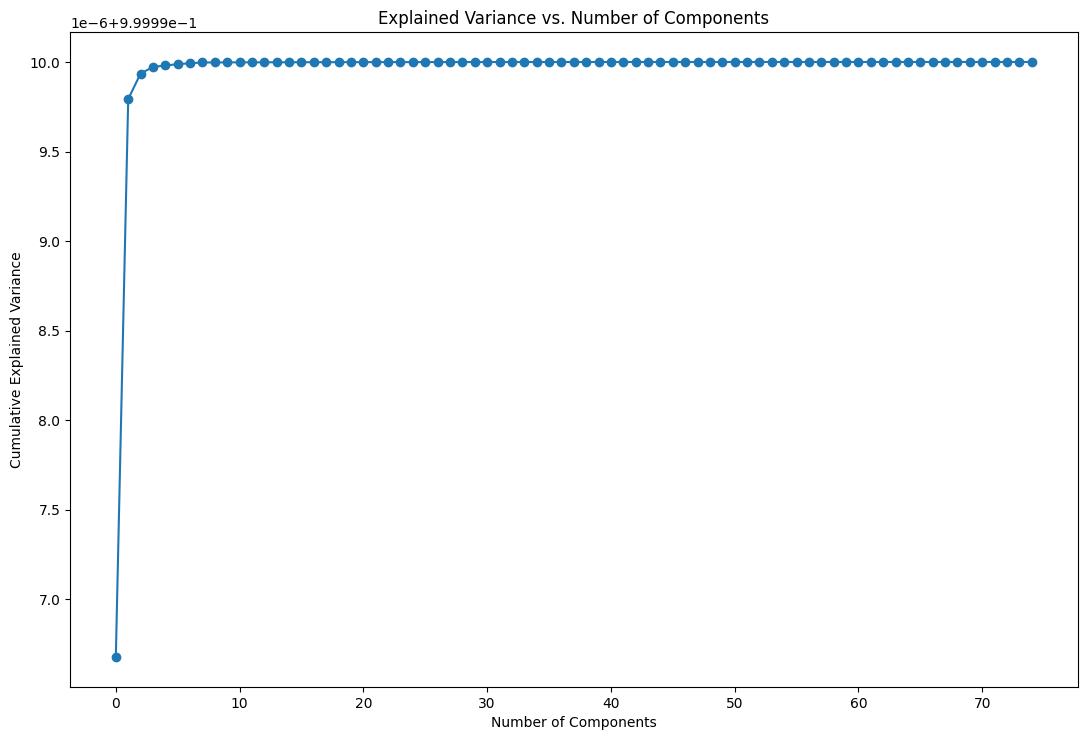

In [46]:
plt.plot(explained_variance_ratio.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()


In [47]:
num_components = 8
X_pca_selected = X_pca[:, :num_components]
pca_data = pd.DataFrame(X_pca_selected, columns=[f"PC{i+1}" for i in range(num_components)])
pca_data['Absenteeism time in hours'] = y 

In [48]:
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Absenteeism time in hours
0,-31536.018742,68.068543,-1.652053,0.463079,1.198442,4.539867,1.065361,-2.258863,4.0
1,-31536.019135,-104.453957,11.377907,11.597778,-2.891235,1.214670,4.265407,0.933960,0.0
2,-31536.019799,-40.978516,-23.482165,3.065184,-0.062041,2.567459,-0.139068,-1.481218,2.0
3,-31536.017928,56.120900,28.629751,4.087311,-2.812425,0.180201,-5.302019,-2.357535,4.0
4,-31536.018742,68.068276,-1.654804,0.458344,1.191286,4.531141,1.050166,-2.271490,2.0
...,...,...,...,...,...,...,...,...,...
735,-6486.018729,67.986580,-2.342544,0.819024,3.640897,1.675126,1.754154,-2.492380,8.0
736,-6486.018346,12.489245,19.366284,2.919212,3.002574,0.676504,-0.101381,-2.432281,4.0
737,128.980854,-104.146486,8.987220,3.003441,5.158862,3.452591,-1.097296,2.704410,0.0
738,128.980877,9.844795,-5.265993,6.167404,4.565635,4.212709,0.200608,1.084981,0.0


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# MLP

In [50]:
X = pca_data.iloc[:, :-1].values
y = df['Absenteeism time in hours'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = MLPClassifier(hidden_layer_sizes=(100,50,25), max_iter=3600, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 3.5472972972972974
Mean Squared Error: 27.925675675675677
R-squared: -0.4607867486912993


In [51]:
X = df.iloc[:, :-1].values
y = df['Absenteeism time in hours'].values

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建并训练ANN模型
model = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=3600, random_state=42)
model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 2.4324324324324325
Mean Squared Error: 19.83783783783784
R-squared: -0.03771349967521287


In [52]:
X = data.iloc[:, :-1].values
y = data['Absenteeism time in hours'].values

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建并训练ANN模型
model = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=3600, random_state=42)
model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
# 评估模型性能
print(f'R-squared: {r2}')

Mean Absolute Error: 2.858108108108108
Mean Squared Error: 20.37162162162162
R-squared: -0.06563562722096972


# 线性回归

In [53]:

X = pca_data.drop('Absenteeism time in hours', axis=1)
y = data['Absenteeism time in hours']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 3.477104851099636
Mean Squared Error: 19.074322544955624
R-squared: 0.0022258391332296013


In [54]:

X = df.drop('Absenteeism time in hours', axis=1)
y = data['Absenteeism time in hours']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化线性回归模型
model = LinearRegression()

# 拟合模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 评估模型性能
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 打印评估指标
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 2.2488647554046013
Mean Squared Error: 12.289371002298955
R-squared: 0.3571453554641677


In [55]:

X = data.drop('Absenteeism time in hours', axis=1)
y = data['Absenteeism time in hours']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 2.7151396146585522
Mean Squared Error: 13.121082446810608
R-squared: 0.31363868901900127


# 决定树

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error


X = pca_data.drop('Absenteeism time in hours', axis=1)
y = df['Absenteeism time in hours']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tree_model = DecisionTreeRegressor(random_state=42)

tree_model.fit(X_train, y_train)


y_pred = tree_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 3.497747747747748
Mean Squared Error: 28.819069069069073
R-squared: -0.507519986074493


In [57]:
X = df.drop('Absenteeism time in hours', axis=1)
y = df['Absenteeism time in hours']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tree_model = DecisionTreeRegressor(random_state=42)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 2.811936936936937
Mean Squared Error: 23.34102852852853
R-squared: -0.2209647340780081


In [58]:

X = data.drop('Absenteeism time in hours', axis=1)
y = df['Absenteeism time in hours']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建决策树回归模型
tree_model = DecisionTreeRegressor(random_state=42)

# 训练模型
tree_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = tree_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 2.897522522522523
Mean Squared Error: 23.613175675675677
R-squared: -0.2352006992472584


# 随机森林

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# 假设数据存储在名为 'data' 的DataFrame中
# 特征（X）和目标变量（y）的选择
X = pca_data.drop('Absenteeism time in hours', axis=1)
y = data['Absenteeism time in hours']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化随机森林回归模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf_model.predict(X_test)

# 评估模型性能
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 3.4673813277563275
Mean Squared Error: 21.924418031776458
R-squared: -0.1468621101792813


In [60]:

X = df.drop('Absenteeism time in hours', axis=1)
y = data['Absenteeism time in hours']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化随机森林回归模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf_model.predict(X_test)

# 评估模型性能
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 2.2477913985413984
Mean Squared Error: 12.096693275732152
R-squared: 0.36722429045595073


In [61]:

X = data.drop('Absenteeism time in hours', axis=1)
y = data['Absenteeism time in hours']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化随机森林回归模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf_model.predict(X_test)

# 评估模型性能
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 2.318272871085371
Mean Squared Error: 11.971547915230811
R-squared: 0.37377062030679076


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
import tensorflow as tf

In [63]:
X = data.drop('Absenteeism time in hours', axis=1)
y = data['Absenteeism time in hours']
sc = StandardScaler()

X = sc.fit_transform(X)
y = sc.fit_transform(y.values.reshape(-1,1))

In [64]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(555, 17)
(185, 17)
(555, 1)
(185, 1)


In [65]:
classifier = Sequential()


classifier.add(Dense(4 , activation = "ReLU"))

classifier.add(Dense(units = 2 , activation = "ReLU"))

classifier.add(Dense(1 , activation = "linear"))
classifier.compile(optimizer = "adam" , 
                   loss = "mean_squared_error" , 
                   metrics = ["mean_absolute_error"])

In [66]:
early = tf.keras.callbacks.EarlyStopping(
    monitor = "val_mean_absolute_error",
    min_delta = 0.001,
    patience = 10,
    verbose = True,
    mode = "auto",
    restore_best_weights = True)

In [67]:
model = classifier.fit(X_train , y_train , validation_split = 0.25 , 
                       batch_size = 10 , epochs = 200 , callbacks = early)

Epoch 1/200
42/42 [==============================] - 2s 6ms/step - loss: 1.2525 - mean_absolute_error: 0.8339 - val_loss: 1.2778 - val_mean_absolute_error: 0.8193
Epoch 2/200
42/42 [==============================] - 0s 3ms/step - loss: 1.1282 - mean_absolute_error: 0.8086 - val_loss: 1.1829 - val_mean_absolute_error: 0.8074
Epoch 3/200
42/42 [==============================] - 0s 4ms/step - loss: 1.0614 - mean_absolute_error: 0.7963 - val_loss: 1.1298 - val_mean_absolute_error: 0.8024
Epoch 4/200
42/42 [==============================] - 0s 3ms/step - loss: 1.0262 - mean_absolute_error: 0.7930 - val_loss: 1.0920 - val_mean_absolute_error: 0.8010
Epoch 5/200
42/42 [==============================] - 0s 3ms/step - loss: 1.0021 - mean_absolute_error: 0.7876 - val_loss: 1.0781 - val_mean_absolute_error: 0.7984
Epoch 6/200
42/42 [==============================] - 0s 3ms/step - loss: 0.9881 - mean_absolute_error: 0.7854 - val_loss: 1.0649 - val_mean_absolute_error: 0.7966
Epoch 7/200
42/42 [===

In [68]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 72        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

In [70]:
y_pred = classifier.predict(X_test)

6/6 [==============================] - 0s 1ms/step


In [71]:
R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

R2 Score= 0.25253261250832004
